In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sklearn
from sklearn.linear_model import LinearRegression

In [49]:
df = pd.read_csv("usfoods_spd_dist_soc_cs_is_er.csv")

In [50]:
df

,depot,truck,timestamp,speed,distance,socpercent,chargingstatus,ignitionstatus,energytype,accumulatedkwh
0,US Foods (La Mirada),eCascadia 1,2023-09-11 07:13:19.063+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,US Foods (La Mirada),eCascadia 1,2023-09-11 07:43:19.063+00,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,US Foods (La Mirada),eCascadia 1,2023-09-11 08:13:19.063+00,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,US Foods (La Mirada),eCascadia 1,2023-09-11 08:43:19.063+00,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,US Foods (La Mirada),eCascadia 1,2023-09-11 09:13:19.063+00,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
62522,US Foods (La Mirada),eCascadia 2,2023-09-29 06:37:02.09+00,NaN,NaN,NaN,NaN,NaN,energy_regen,2340.09
62523,US Foods (La Mirada),eCascadia 2,2023-09-29 06:37:02.09+00,NaN,NaN,NaN,NaN,NaN,idle_energy,384.85
62524,US Foods (La Mirada),eCascadia 2,2023-09-29 06:37:02.093+00,NaN,NaN,NaN,NaN,NaN,driving_energy,10637.78
62525,US Foods (La Mirada),eCascadia 2,2023-09-29 06:37:02.093+00,NaN,NaN,NaN,NaN,NaN,energy_regen,2340.09


In [51]:
##new column that shows day of the run
df["day"]=df['timestamp'].str[8:10].astype(int)-10
df

,depot,truck,timestamp,speed,distance,socpercent,chargingstatus,ignitionstatus,energytype,accumulatedkwh,day
0,US Foods (La Mirada),eCascadia 1,2023-09-11 07:13:19.063+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,US Foods (La Mirada),eCascadia 1,2023-09-11 07:43:19.063+00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1
2,US Foods (La Mirada),eCascadia 1,2023-09-11 08:13:19.063+00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1
3,US Foods (La Mirada),eCascadia 1,2023-09-11 08:43:19.063+00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1
4,US Foods (La Mirada),eCascadia 1,2023-09-11 09:13:19.063+00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
62522,US Foods (La Mirada),eCascadia 2,2023-09-29 06:37:02.09+00,NaN,NaN,NaN,NaN,NaN,energy_regen,2340.09,19
62523,US Foods (La Mirada),eCascadia 2,2023-09-29 06:37:02.09+00,NaN,NaN,NaN,NaN,NaN,idle_energy,384.85,19
62524,US Foods (La Mirada),eCascadia 2,2023-09-29 06:37:02.093+00,NaN,NaN,NaN,NaN,NaN,driving_energy,10637.78,19
62525,US Foods (La Mirada),eCascadia 2,2023-09-29 06:37:02.093+00,NaN,NaN,NaN,NaN,NaN,energy_regen,2340.09,19


In [52]:
#make new DF that calculates totals for each day
data = {'Vehicle': ['eCascadia 1'] * 19 + ['eCascadia 2'] * 19,
        'Days': list(range(1, 20)) * 2}
days = pd.DataFrame(data)

In [53]:
days

,Vehicle,Days
0,eCascadia 1,1
1,eCascadia 1,2
2,eCascadia 1,3
3,eCascadia 1,4
4,eCascadia 1,5
5,eCascadia 1,6
6,eCascadia 1,7
7,eCascadia 1,8
8,eCascadia 1,9
9,eCascadia 1,10


# Speeds

In [54]:
## calculate distribution of speeds

## new df
speeds = df[['truck', 'timestamp', 'speed', 'day']].dropna(subset=['speed'])
speeds = df[df['speed']>=0]

bins=[0,25,50,75,100]

In [100]:
speeds

,depot,truck,timestamp,speed,distance,socpercent,chargingstatus,ignitionstatus,energytype,accumulatedkwh,day
0,US Foods (La Mirada),eCascadia 1,2023-09-11 07:13:19.063+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1
1,US Foods (La Mirada),eCascadia 1,2023-09-11 07:43:19.063+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1
2,US Foods (La Mirada),eCascadia 1,2023-09-11 08:13:19.063+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1
3,US Foods (La Mirada),eCascadia 1,2023-09-11 08:43:19.063+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1
4,US Foods (La Mirada),eCascadia 1,2023-09-11 09:13:19.063+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
62508,US Foods (La Mirada),eCascadia 2,2023-09-29 06:36:24+00,0.000000,0.001381,NaN,NaN,NaN,NaN,NaN,19
62512,US Foods (La Mirada),eCascadia 2,2023-09-29 06:36:28+00,1.864512,0.001036,NaN,NaN,NaN,NaN,NaN,19
62513,US Foods (La Mirada),eCascadia 2,2023-09-29 06:36:33+00,4.350528,0.004316,NaN,NaN,NaN,NaN,NaN,19
62517,US Foods (La Mirada),eCascadia 2,2023-09-29 06:36:38+00,0.000000,0.003021,NaN,NaN,NaN,NaN,NaN,19


In [55]:
# print results of speed distributions for each e-Cascadia
speed_pcts = [speeds['speed'].between(0, 0.1).sum()/len(speeds),
    speeds['speed'].between(0.1, 10).sum()/len(speeds), speeds['speed'].between(10, 20).sum()/len(speeds),
    speeds['speed'].between(20, 30).sum()/len(speeds), speeds['speed'].between(30, 40).sum()/len(speeds),
    speeds['speed'].between(40, 50).sum()/len(speeds), speeds['speed'].between(50, 60).sum()/len(speeds),
    speeds['speed'].between(60, 70).sum()/len(speeds)]

In [103]:
speeds[(speeds['truck']== 'eCascadia ')]['speed'].between(30,40)

,depot,truck,timestamp,speed,distance,socpercent,chargingstatus,ignitionstatus,energytype,accumulatedkwh,day
62373,US Foods (La Mirada),eCascadia 2,2023-09-28 22:30:57+00,6.215040,0.031075,NaN,NaN,NaN,NaN,NaN,18
62374,US Foods (La Mirada),eCascadia 2,2023-09-28 22:31:05+00,9.944065,0.017955,NaN,NaN,NaN,NaN,NaN,18
62380,US Foods (La Mirada),eCascadia 2,2023-09-28 22:31:15+00,0.000000,0.013811,NaN,NaN,NaN,NaN,NaN,18
62387,US Foods (La Mirada),eCascadia 2,2023-09-28 22:31:21+00,1.243008,0.001036,NaN,NaN,NaN,NaN,NaN,18
62391,US Foods (La Mirada),eCascadia 2,2023-09-28 22:31:22+00,0.000000,0.000173,NaN,NaN,NaN,NaN,NaN,18
62392,US Foods (La Mirada),eCascadia 2,2023-09-28 22:31:24+00,1.243008,0.000345,NaN,NaN,NaN,NaN,NaN,18
62396,US Foods (La Mirada),eCascadia 2,2023-09-28 22:31:29+00,0.000000,0.000863,NaN,NaN,NaN,NaN,NaN,18
62403,US Foods (La Mirada),eCascadia 2,2023-09-28 22:31:37+00,1.243008,0.001381,NaN,NaN,NaN,NaN,NaN,18
62404,US Foods (La Mirada),eCascadia 2,2023-09-28 22:31:39+00,0.000000,0.000345,NaN,NaN,NaN,NaN,NaN,18
62408,US Foods (La Mirada),eCascadia 2,2023-09-28 22:32:04.063+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,18


In [104]:
#calculate pcts of speeds for each day
days['pct 0 mph'] = None
days['pct 0-10 mph'] = None
days['pct 10-20 mph'] = None
days['pct 20-30 mph'] = None
days['pct 30-40 mph'] = None
days['pct 40-50 mph'] = None
days['pct 50-60 mph'] = None
days['pct 60-70 mph'] = None
days['pct 70-80 mph'] = None

for day in range(1,20):
    #eCascadia 1

    days['pct 0 mph'][day-1] = 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')]['speed'].between(0,0.01).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')])
    days['pct 0-10 mph'][day-1] = 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')]['speed'].between(0.01,10).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')])
    days['pct 10-20 mph'][day-1] = 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')]['speed'].between(10,20).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')])
    days['pct 20-30 mph'][day-1] = 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')]['speed'].between(20,30).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')])
    days['pct 30-40 mph'][day-1]= 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')]['speed'].between(30,40).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')])
    days['pct 40-50 mph'][day-1]= 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')]['speed'].between(40,50).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')])
    days['pct 50-60 mph'][day-1]= 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')]['speed'].between(50,60).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')])
    days['pct 60-70 mph'][day-1]= 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')]['speed'].between(60,70).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')])
    days['pct 70-80 mph'][day-1]= 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')]['speed'].between(70,80).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 1')])
    #eCascadia 2
    days['pct 0 mph'][day+18] = 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')]['speed'].between(0,0.01).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')])
    days['pct 0-10 mph'][day+18] = 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')]['speed'].between(0.01,10).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')])
    days['pct 10-20 mph'][day+18] = 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')]['speed'].between(10,20).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')])
    days['pct 20-30 mph'][day+18] = 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')]['speed'].between(20,30).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')])
    days['pct 30-40 mph'][day+18]= 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')]['speed'].between(30,40).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')])
    days['pct 40-50 mph'][day+18]= 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')]['speed'].between(40,50).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')])
    days['pct 50-60 mph'][day+18]= 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')]['speed'].between(50,60).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')])
    days['pct 60-70 mph'][day+18]= 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')]['speed'].between(60,70).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')])
    days['pct 70-80 mph'][day+18]= 100*speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')]['speed'].between(70,80).sum()/len(speeds[(speeds['day']==day)&(speeds['truck']== 'eCascadia 2')])


C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:17: SettingWithCopyWarning:


A v

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:32: SettingWithCopyWarning:


A v

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:21: SettingWithCopyWarning:


A v

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:32: SettingWithCopyWarning:


A v

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:32: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:33: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a sli

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\4183829706.py:32: SettingWithCopyWarning:


A v

In [105]:
days

,Vehicle,Days,pct 0 mph,pct 0-10 mph,pct 10-20 mph,pct 20-30 mph,pct 30-40 mph,pct 40-50 mph,pct 50-60 mph,pct 60-70 mph,pct 70-80 mph,miles,regenerated energy (kWh),driving energy (kWh),idling energy (kWh),idle + driving energy (kWh),energy consumed per mile (kWh/mile),regen rate (kWh/mile),pct 0-30 mph,pct 40-60 mph
0,eCascadia 1,1,36.410635,18.020679,13.589365,11.152142,5.760709,3.692762,9.15805,2.215657,0.0,76.176736,25.5,29.17,190.29,219.46,2.880932,0.334748,42.762186,12.850812
1,eCascadia 1,2,35.890411,25.342466,15.479452,7.191781,3.287671,2.876712,9.178082,0.753425,0.0,75.038499,25.7,24.5,177.80,202.3,2.695949,0.342491,48.013699,12.054795
2,eCascadia 1,3,36.744505,22.527473,12.774725,11.401099,4.18956,2.953297,6.456044,2.953297,0.0,72.224584,30.69,26.15,177.20,203.35,2.815523,0.424925,46.703297,9.409341
3,eCascadia 1,4,36.715997,26.0747,12.05074,7.329105,2.536998,3.805497,10.42988,1.057082,0.0,70.560579,23.16,23.95,165.37,189.32,2.683085,0.328229,45.454545,14.235377
4,eCascadia 1,5,37.831691,21.228203,15.087187,9.401061,4.321456,1.743745,6.899166,3.487491,0.0,69.680661,22.81,24.42,168.17,192.59,2.763895,0.327351,45.716452,8.642911
7,eCascadia 1,8,40.762712,19.491525,10.084746,8.898305,4.152542,3.305085,11.186441,2.118644,0.0,69.539371,17.86,24.22,164.02,188.24,2.706956,0.256833,38.474576,14.491525
8,eCascadia 1,9,36.776557,21.538462,12.820513,10.769231,5.567766,3.296703,8.351648,0.879121,0.0,72.483817,26.83,19.2,162.99,182.19,2.513527,0.370152,45.128205,11.648352
9,eCascadia 1,10,39.455782,19.727891,9.94898,8.843537,4.336735,5.102041,10.459184,2.12585,0.0,70.377725,19.98,23.45,164.28,187.73,2.667463,0.283897,38.520408,15.561224
10,eCascadia 1,11,38.203068,23.228634,12.344777,7.450694,3.798393,3.798393,10.226443,0.949598,0.0,71.335798,25.09,20.0,171.04,191.04,2.678038,0.351717,43.024105,14.024836
11,eCascadia 1,12,37.944359,19.242658,12.210201,10.510046,6.568779,3.09119,8.964451,1.468315,0.0,70.121221,24.52,19.04,160.41,179.45,2.559140,0.349680,41.962906,12.055641


In [106]:
##pie chart of speeds

labels = ['0 mph', '0-10 mph', '10-20 mph', '20-30 mph', '30-40 mph', '40-50 mph', '50-60 mph', '60-70 mph']

fig = go.Figure(data=[go.Pie(labels=labels, values=speed_pcts)],
               layout=go.Layout(title=go.layout.Title(text="Spread of Speeds")))
fig.show()

# Distances

In [59]:
## new df
distances = df[['truck', 'timestamp', 'distance', 'day']].dropna(subset=['distance'])
distances

,truck,timestamp,distance,day
1,eCascadia 1,2023-09-11 07:43:19.063+00,0.000000,1
2,eCascadia 1,2023-09-11 08:13:19.063+00,0.000000,1
3,eCascadia 1,2023-09-11 08:43:19.063+00,0.000000,1
4,eCascadia 1,2023-09-11 09:13:19.063+00,0.000000,1
5,eCascadia 1,2023-09-11 09:43:19.063+00,0.000000,1
...,...,...,...,...
62508,eCascadia 2,2023-09-29 06:36:24+00,0.001381,19
62512,eCascadia 2,2023-09-29 06:36:28+00,0.001036,19
62513,eCascadia 2,2023-09-29 06:36:33+00,0.004316,19
62517,eCascadia 2,2023-09-29 06:36:38+00,0.003021,19


In [60]:
#calculate total miles driven each day
days['miles'] = None

for day in range(1,20):
    dist1 = distances[(distances['day'] == day) & (distances['truck'] == 'eCascadia 1')]['distance'].sum()
    dist2 = distances[(distances['day'] == day) & (distances['truck'] == 'eCascadia 2')]['distance'].sum()
    
    days['miles'][day-1] = dist1
    days['miles'][day+18] = dist2
    
days

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\1772378003.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\1772378003.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vehicle,Days,pct 0 mph,pct 0-10 mph,pct 10-20 mph,pct 20-30 mph,pct 30-40 mph,pct 40-50 mph,pct 50-60 mph,pct 60-70 mph,pct 70-80 mph,miles
0,eCascadia 1,1,36.410635,18.020679,13.589365,11.152142,5.760709,3.692762,9.15805,2.215657,0.0,76.176736
1,eCascadia 1,2,35.890411,25.342466,15.479452,7.191781,3.287671,2.876712,9.178082,0.753425,0.0,75.038499
2,eCascadia 1,3,36.744505,22.527473,12.774725,11.401099,4.18956,2.953297,6.456044,2.953297,0.0,72.224584
3,eCascadia 1,4,36.715997,26.0747,12.05074,7.329105,2.536998,3.805497,10.42988,1.057082,0.0,70.560579
4,eCascadia 1,5,37.831691,21.228203,15.087187,9.401061,4.321456,1.743745,6.899166,3.487491,0.0,69.680661
5,eCascadia 1,6,95.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022605
6,eCascadia 1,7,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,eCascadia 1,8,40.762712,19.491525,10.084746,8.898305,4.152542,3.305085,11.186441,2.118644,0.0,69.539371
8,eCascadia 1,9,36.776557,21.538462,12.820513,10.769231,5.567766,3.296703,8.351648,0.879121,0.0,72.483817
9,eCascadia 1,10,39.455782,19.727891,9.94898,8.843537,4.336735,5.102041,10.459184,2.12585,0.0,70.377725


# Energy

In [61]:
## new df for energy
energies = df[['truck', 'timestamp', 'energytype','accumulatedkwh', 'day']].dropna(subset=['accumulatedkwh'])

In [62]:
energies

,truck,timestamp,energytype,accumulatedkwh,day
6,eCascadia 1,2023-09-11 09:59:23.04+00,energy_regen,806.09,1
7,eCascadia 1,2023-09-11 09:59:23.04+00,idle_energy,751.25,1
8,eCascadia 1,2023-09-11 09:59:23.043+00,driving_energy,5823.85,1
11,eCascadia 1,2023-09-11 09:59:23.12+00,energy_regen,806.09,1
12,eCascadia 1,2023-09-11 09:59:23.13+00,driving_energy,5823.85,1
...,...,...,...,...,...
62522,eCascadia 2,2023-09-29 06:37:02.09+00,energy_regen,2340.09,19
62523,eCascadia 2,2023-09-29 06:37:02.09+00,idle_energy,384.85,19
62524,eCascadia 2,2023-09-29 06:37:02.093+00,driving_energy,10637.78,19
62525,eCascadia 2,2023-09-29 06:37:02.093+00,energy_regen,2340.09,19


In [63]:
days['regenerated energy (kWh)'] = None
days['driving energy (kWh)'] = None
days['idling energy (kWh)'] = None

regen = energies[energies['energytype']=='energy_regen'].dropna(subset=['accumulatedkwh']).reset_index(drop=True)
idling = energies[energies['energytype']=='idle_energy'].dropna(subset=['accumulatedkwh']).reset_index(drop=True)
driving = energies[energies['energytype']=='driving_energy'].dropna(subset=['accumulatedkwh']).reset_index(drop=True)

for day in range(1,20):
    #eCascadia 1
    regenmax = regen[(regen['day']==day)&(regen['truck']=='eCascadia 1')]['accumulatedkwh'].max()
    regenmin = regen[(regen['day']==day)&(regen['truck']=='eCascadia 1')]['accumulatedkwh'].min()
    idlemax = idling[(idling['day']==day)&(idling['truck']=='eCascadia 1')]['accumulatedkwh'].max()
    idlemin = idling[(idling['day']==day)&(idling['truck']=='eCascadia 1')]['accumulatedkwh'].min()
    drivmax = driving[(driving['day']==day)&(driving['truck']=='eCascadia 1')]['accumulatedkwh'].max()
    drivmin = driving[(driving['day']==day)&(driving['truck']=='eCascadia 1')]['accumulatedkwh'].min()
    
    if pd.isna(regenmax):
        days['regenerated energy (kWh)'][day-1]=0
        days['driving energy (kWh)'][day-1]=0
        days['idling energy (kWh)'][day-1]=0
    else:
        days['regenerated energy (kWh)'][day-1] = regenmax-regenmin
        days['driving energy (kWh)'][day-1]= idlemax-idlemin
        days['idling energy (kWh)'][day-1]= drivmax-drivmin
    
    #eCascadia 2
    regenmax = regen[(regen['day']==day)&(regen['truck']=='eCascadia 2')]['accumulatedkwh'].max()
    regenmin = regen[(regen['day']==day)&(regen['truck']=='eCascadia 2')]['accumulatedkwh'].min()
    idlemax = idling[(idling['day']==day)&(idling['truck']=='eCascadia 2')]['accumulatedkwh'].max()
    idlemin = idling[(idling['day']==day)&(idling['truck']=='eCascadia 2')]['accumulatedkwh'].min()
    drivmax = driving[(driving['day']==day)&(driving['truck']=='eCascadia 2')]['accumulatedkwh'].max()
    drivmin = driving[(driving['day']==day)&(driving['truck']=='eCascadia 2')]['accumulatedkwh'].min()
    
    if pd.isna(regenmax):
        days['regenerated energy (kWh)'][day+18] =0
        days['driving energy (kWh)'][day+18]=0
        days['idling energy (kWh)'][day+18]=0
    else:
        days['regenerated energy (kWh)'][day+18] = regenmax-regenmin
        days['driving energy (kWh)'][day+18]= idlemax-idlemin
        days['idling energy (kWh)'][day+18]= drivmax-drivmin
        
    days['regenerated energy (kWh)'][day+18] = regenmax-regenmin
    days['driving energy (kWh)'][day+18]= idlemax-idlemin
    days['idling energy (kWh)'][day+18]= drivmax-drivmin

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\869637650.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\869637650.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\869637650.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\869637650.py:40: SettingWithCopyWarning:


A value

In [64]:
##calculating efficiency
days['idle + driving energy (kWh)'] = days['driving energy (kWh)'] + days['idling energy (kWh)']
days['energy consumed per mile (kWh/mile)'] = days['idle + driving energy (kWh)']/days['miles']
days['regen rate (kWh/mile)'] = days['regenerated energy (kWh)']/days['miles']
#ignore/drop days 6,7, 13, 14, 19

In [65]:
days = days[~days['Days'].isin([6,7,13,14,19])]

In [66]:
days['idle + driving energy (kWh)'].sum()/days['miles'].sum()

2.4222477761885295

In [67]:
days['energy consumed per mile (kWh/mile)'].mean()

2.455670125974446

In [68]:
days['pct 0-30 mph'] = days['pct 0-10 mph']+days['pct 20-30 mph']+days['pct 10-20 mph']
days['pct 40-60 mph'] = days['pct 40-50 mph']+days['pct 50-60 mph']

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\3404135014.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\3404135014.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
# Convert 'pct 0 mph' and 'idling energy (kWh)' to numeric, coerce errors to NaN
days['pct 0 mph'] = pd.to_numeric(days['pct 0 mph'], errors='coerce')
days['idling energy (kWh)'] = pd.to_numeric(days['idling energy (kWh)'], errors='coerce')
days['energy consumed per mile (kWh/mile)'] = pd.to_numeric(days['energy consumed per mile (kWh/mile)'], errors='coerce')
days['regen rate (kWh/mile)'] = pd.to_numeric(days['regen rate (kWh/mile)'], errors='coerce')

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\3199330809.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\3199330809.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joshu\AppData\Local\Temp\ipykernel_10852\3199330809.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [70]:
days.head()

,Vehicle,Days,pct 0 mph,pct 0-10 mph,pct 10-20 mph,pct 20-30 mph,pct 30-40 mph,pct 40-50 mph,pct 50-60 mph,pct 60-70 mph,pct 70-80 mph,miles,regenerated energy (kWh),driving energy (kWh),idling energy (kWh),idle + driving energy (kWh),energy consumed per mile (kWh/mile),regen rate (kWh/mile),pct 0-30 mph,pct 40-60 mph
0,eCascadia 1,1,36.410635,18.020679,13.589365,11.152142,5.760709,3.692762,9.15805,2.215657,0.0,76.176736,25.5,29.17,190.29,219.46,2.880932,0.334748,42.762186,12.850812
1,eCascadia 1,2,35.890411,25.342466,15.479452,7.191781,3.287671,2.876712,9.178082,0.753425,0.0,75.038499,25.7,24.5,177.80,202.3,2.695949,0.342491,48.013699,12.054795
2,eCascadia 1,3,36.744505,22.527473,12.774725,11.401099,4.18956,2.953297,6.456044,2.953297,0.0,72.224584,30.69,26.15,177.20,203.35,2.815523,0.424925,46.703297,9.409341
3,eCascadia 1,4,36.715997,26.0747,12.05074,7.329105,2.536998,3.805497,10.42988,1.057082,0.0,70.560579,23.16,23.95,165.37,189.32,2.683085,0.328229,45.454545,14.235377
4,eCascadia 1,5,37.831691,21.228203,15.087187,9.401061,4.321456,1.743745,6.899166,3.487491,0.0,69.680661,22.81,24.42,168.17,192.59,2.763895,0.327351,45.716452,8.642911


In [71]:
days.to_csv('ROL Days Summary.csv')

In [72]:
days

,Vehicle,Days,pct 0 mph,pct 0-10 mph,pct 10-20 mph,pct 20-30 mph,pct 30-40 mph,pct 40-50 mph,pct 50-60 mph,pct 60-70 mph,pct 70-80 mph,miles,regenerated energy (kWh),driving energy (kWh),idling energy (kWh),idle + driving energy (kWh),energy consumed per mile (kWh/mile),regen rate (kWh/mile),pct 0-30 mph,pct 40-60 mph
0,eCascadia 1,1,36.410635,18.020679,13.589365,11.152142,5.760709,3.692762,9.15805,2.215657,0.0,76.176736,25.5,29.17,190.29,219.46,2.880932,0.334748,42.762186,12.850812
1,eCascadia 1,2,35.890411,25.342466,15.479452,7.191781,3.287671,2.876712,9.178082,0.753425,0.0,75.038499,25.7,24.5,177.80,202.3,2.695949,0.342491,48.013699,12.054795
2,eCascadia 1,3,36.744505,22.527473,12.774725,11.401099,4.18956,2.953297,6.456044,2.953297,0.0,72.224584,30.69,26.15,177.20,203.35,2.815523,0.424925,46.703297,9.409341
3,eCascadia 1,4,36.715997,26.0747,12.05074,7.329105,2.536998,3.805497,10.42988,1.057082,0.0,70.560579,23.16,23.95,165.37,189.32,2.683085,0.328229,45.454545,14.235377
4,eCascadia 1,5,37.831691,21.228203,15.087187,9.401061,4.321456,1.743745,6.899166,3.487491,0.0,69.680661,22.81,24.42,168.17,192.59,2.763895,0.327351,45.716452,8.642911
7,eCascadia 1,8,40.762712,19.491525,10.084746,8.898305,4.152542,3.305085,11.186441,2.118644,0.0,69.539371,17.86,24.22,164.02,188.24,2.706956,0.256833,38.474576,14.491525
8,eCascadia 1,9,36.776557,21.538462,12.820513,10.769231,5.567766,3.296703,8.351648,0.879121,0.0,72.483817,26.83,19.2,162.99,182.19,2.513527,0.370152,45.128205,11.648352
9,eCascadia 1,10,39.455782,19.727891,9.94898,8.843537,4.336735,5.102041,10.459184,2.12585,0.0,70.377725,19.98,23.45,164.28,187.73,2.667463,0.283897,38.520408,15.561224
10,eCascadia 1,11,38.203068,23.228634,12.344777,7.450694,3.798393,3.798393,10.226443,0.949598,0.0,71.335798,25.09,20.0,171.04,191.04,2.678038,0.351717,43.024105,14.024836
11,eCascadia 1,12,37.944359,19.242658,12.210201,10.510046,6.568779,3.09119,8.964451,1.468315,0.0,70.121221,24.52,19.04,160.41,179.45,2.55914,0.34968,41.962906,12.055641


In [73]:
# Create an empty dataframe to store the mean values
days_avg = pd.DataFrame()

# Group by 'Vehicle' and calculate the mean for each column separately
for column in days.columns:
    if column not in ['Vehicle', 'Days']:
        mean_values = days.groupby('Vehicle')[column].mean()
        days_avg[column + '_avg'] = mean_values
days_avg = days_avg.transpose()
days_avg.to_csv('Vehicle Daily Averages.csv')

# Analysis

In [107]:
# Filter data for eCascadia 1 and eCascadia 2
df_ec1 = days[days['Vehicle'] == 'eCascadia 1']
df_ec2 = days[days['Vehicle'] == 'eCascadia 2']

# Calculate the average percent of time for each speed interval
avg_pct_ec1 = df_ec1.iloc[:, 2:10].mean()
avg_pct_ec2 = df_ec2.iloc[:, 2:10].mean()

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=['eCascadia 1', 'eCascadia 2'], specs=[[{"type": "domain"}, {"type": "domain"}]])

# Add pie chart for eCascadia 1
fig.add_trace(
    go.Pie(labels=avg_pct_ec1.index, values=avg_pct_ec1, sort=False),
    row=1, col=1
)

# Add pie chart for eCascadia 2
fig.add_trace(
    go.Pie(labels=avg_pct_ec2.index, values=avg_pct_ec2, sort=False),
    row=1, col=2
)

# Update layout
fig.update_layout(title_text='Average Percent of Time Spent on Each Speed Interval',
                  showlegend=True)

# Show the plot
fig.show()

<Axes: xlabel='pct 0-30 mph', ylabel='regenerated energy (kWh)'>

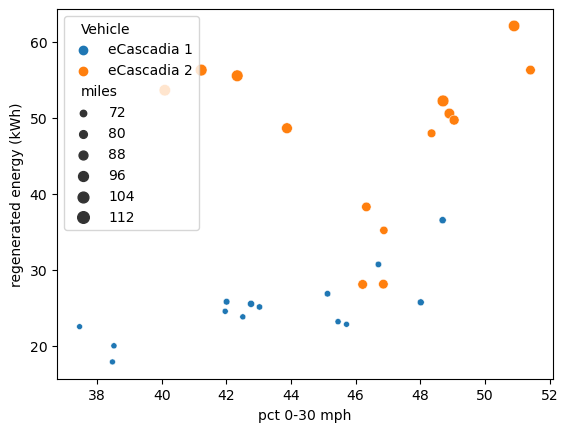

In [75]:
sns.scatterplot(data=days, x='pct 0-30 mph', y='regenerated energy (kWh)', hue='Vehicle', size='miles')

<Axes: xlabel='pct 40-60 mph', ylabel='regenerated energy (kWh)'>

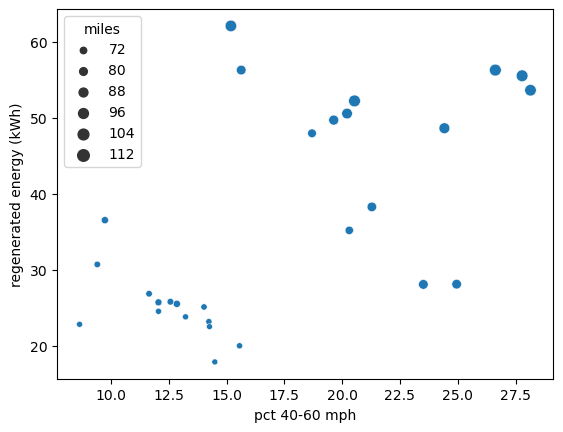

In [76]:
sns.scatterplot(data=days, x='pct 40-60 mph', y='regenerated energy (kWh)', size='miles')

Regression score is 0.2100148785891507


<Axes: xlabel='pct 0-30 mph', ylabel='regenerated energy (kWh)'>

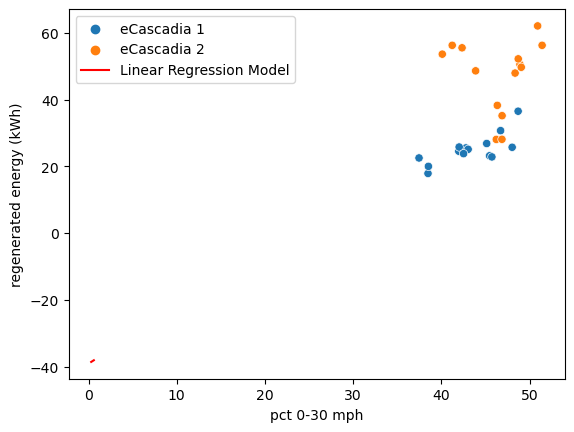

In [77]:
X = days['pct 0-30 mph'].values.reshape(-1, 1)
y = days['regenerated energy (kWh)'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print("Regression score is", reg.score(X, y))
sns.scatterplot(data=days, x='pct 0-30 mph', y='regenerated energy (kWh)', hue='Vehicle')
x_test=np.linspace(0.30,0.60,1000).reshape(-1,1)
y_test = reg.predict(x_test)
x_test_1d = x_test.flatten()
sns.lineplot(x=x_test_1d, y=y_test.flatten(), color='red', label='Linear Regression Model')

Regression score is 0.350184919568993


<Axes: xlabel='pct 40-60 mph', ylabel='regenerated energy (kWh)'>

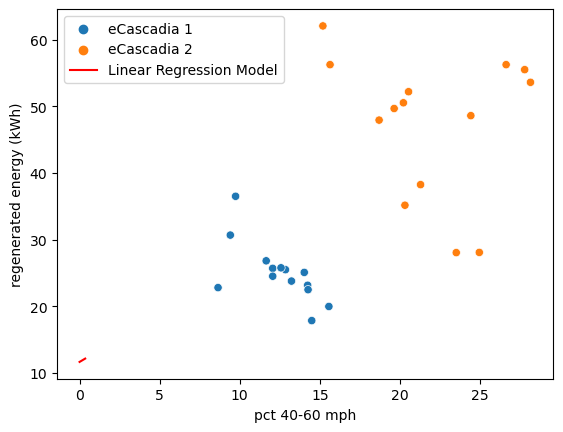

In [78]:
X = days['pct 40-60 mph'].values.reshape(-1, 1)
y = days['regenerated energy (kWh)'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print("Regression score is", reg.score(X, y))
sns.scatterplot(data=days, x='pct 40-60 mph', y='regenerated energy (kWh)', hue='Vehicle')
x_test=np.linspace(0.0,0.35,1000).reshape(-1,1)
y_test = reg.predict(x_test)
x_test_1d = x_test.flatten()
sns.lineplot(x=x_test_1d, y=y_test.flatten(), color='red', label='Linear Regression Model')

<Axes: xlabel='pct 40-60 mph', ylabel='regenerated energy (kWh)'>

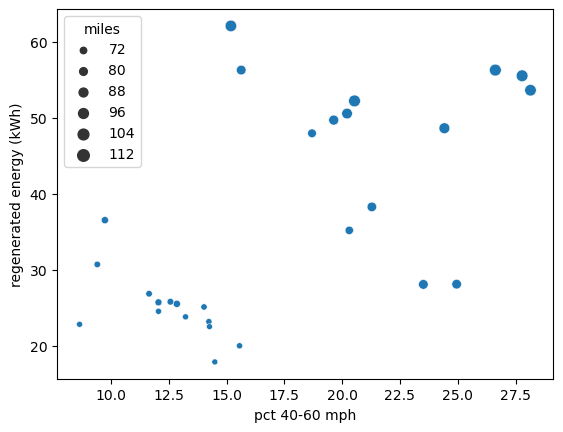

In [79]:
sns.scatterplot(data=days, x='pct 40-60 mph', y='regenerated energy (kWh)',size='miles')
#sns.scatterplot(data=days, x='pct 0-30 mph', y='regenerated energy (kWh)', size='miles')

Regression score is 0.7362430279533783
An extra percent of total driving time at 0mph is associated with 0.01 kWh less energy regenerated per trip.


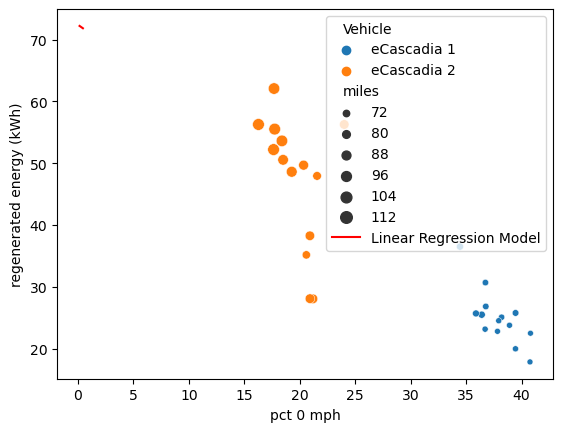

In [80]:
X = days['pct 0 mph'].values.reshape(-1, 1)
y = days['regenerated energy (kWh)'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print("Regression score is", reg.score(X, y))
sns.scatterplot(data=days, x='pct 0 mph', y='regenerated energy (kWh)', size='miles', hue='Vehicle')
x_test=np.linspace(0.15,0.45,1000).reshape(-1,1)
y_test = reg.predict(x_test)
x_test_1d = x_test.flatten()
sns.lineplot(x=x_test_1d, y=y_test.flatten(), color='red', label='Linear Regression Model')
print("An extra percent of total driving time at 0mph is associated with", round(abs(reg.coef_[0][0]/100),2), "kWh less energy regenerated per trip.")

Regression score is 0.46989729959259974
An extra percent of total driving time at 0mph is associated with 0.0001 kWh less energy regenerated per mile.


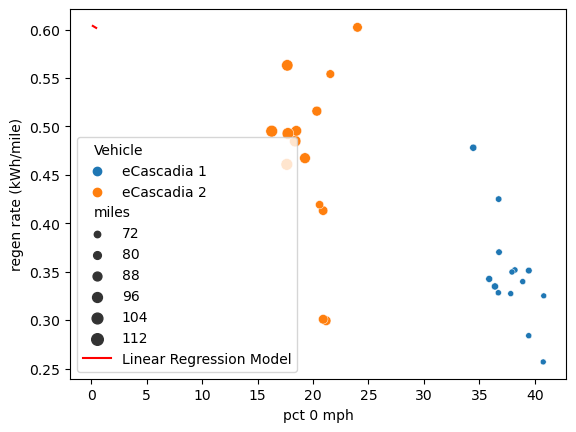

In [81]:
X = days['pct 0 mph'].values.reshape(-1, 1)
y = days['regen rate (kWh/mile)'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print("Regression score is", reg.score(X, y))
sns.scatterplot(data=days, x='pct 0 mph', y='regen rate (kWh/mile)', size='miles', hue='Vehicle')
x_test=np.linspace(0.15,0.45,1000).reshape(-1,1)
y_test = reg.predict(x_test)
x_test_1d = x_test.flatten()
sns.lineplot(x=x_test_1d, y=y_test.flatten(), color='red', label='Linear Regression Model')
print("An extra percent of total driving time at 0mph is associated with", round(abs(reg.coef_[0][0]/100),4), "kWh less energy regenerated per mile.")

Regression score is 0.706087453031178
An extra percent of total driving time at 0mph is associated with 0.02183 kWh less energy consumed per mile.


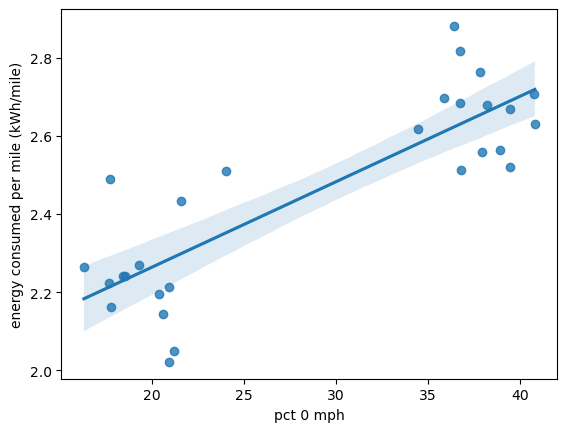

In [95]:
X = days['pct 0 mph'].values.reshape(-1, 1)
y = days['energy consumed per mile (kWh/mile)'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print("Regression score is", reg.score(X, y))
sns.regplot(data=days, x='pct 0 mph', y='energy consumed per mile (kWh/mile)')
#x_test=np.linspace(0.15,0.45,1000).reshape(-1,1)
#y_test = reg.predict(x_test)
#x_test_1d = x_test.flatten()
#sns.lineplot(x=x_test_1d, y=y_test.flatten(), color='red', label='Linear Regression Model')
print("An extra percent of total driving time at 0mph is associated with", round(abs(reg.coef_[0][0]),5), "kWh less energy consumed per mile.")

Regression score is 0.706087453031178
An extra percent of total driving time at 0mph is associated with 0.0002 kWh more energy consumed per mile.


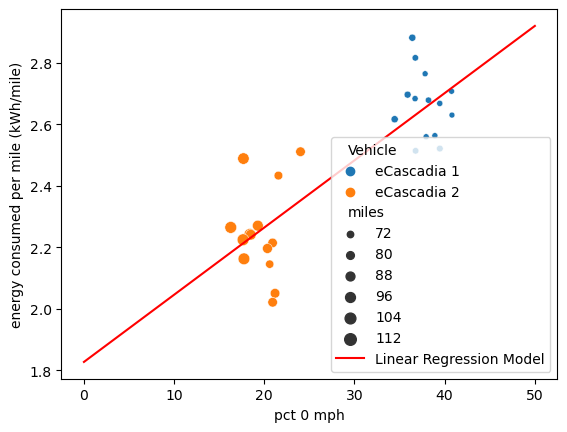

In [83]:
X = days['pct 0 mph'].values.reshape(-1, 1)
y = days['energy consumed per mile (kWh/mile)'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print("Regression score is", reg.score(X, y))
sns.scatterplot(data=days, x='pct 0 mph', y='energy consumed per mile (kWh/mile)', size='miles', hue='Vehicle')
x_test=np.linspace(0,50,1000).reshape(-1,1)
y_test = reg.predict(x_test)
x_test_1d = x_test.flatten()
sns.lineplot(x=x_test_1d, y=y_test.flatten(), color='red', label='Linear Regression Model')
print("An extra percent of total driving time at 0mph is associated with", round(abs(reg.coef_[0][0])/100,4), "kWh more energy consumed per mile.")

<Axes: xlabel='pct 40-60 mph', ylabel='energy consumed per mile (kWh/mile)'>

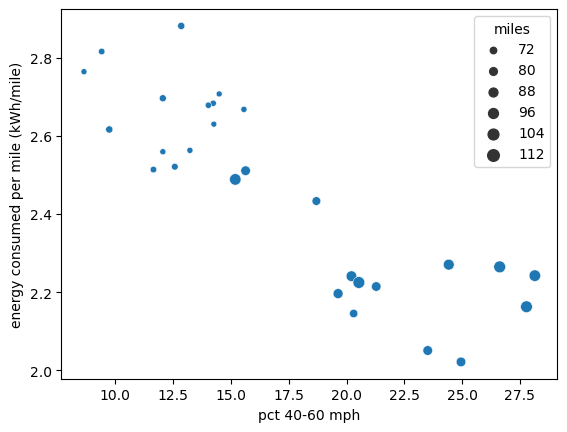

In [84]:
sns.scatterplot(data=days, x='pct 40-60 mph', y='energy consumed per mile (kWh/mile)', size='miles')

<Axes: xlabel='pct 40-60 mph', ylabel='energy consumed per mile (kWh/mile)'>

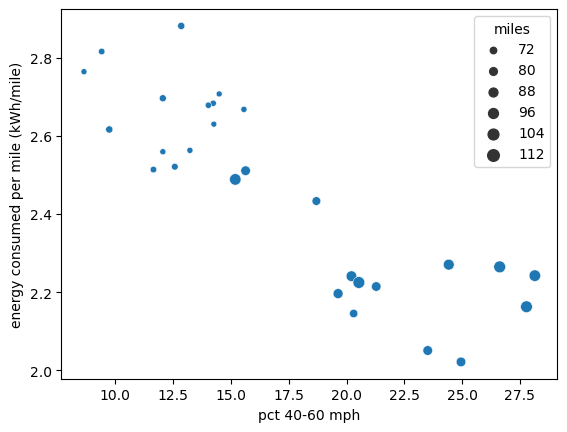

In [85]:
sns.scatterplot(data=days, x='pct 40-60 mph', y='energy consumed per mile (kWh/mile)', size='miles')

Regression score is 0.11409723267856908
An extra kWh of energy regenerated per mile is associated with 0.88011 kWh less energy consumed per mile.


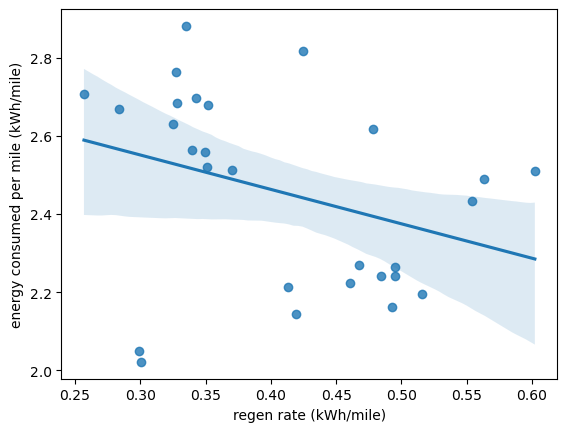

In [98]:
X = days['regen rate (kWh/mile)'].values.reshape(-1, 1)
y = days['energy consumed per mile (kWh/mile)'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print("Regression score is", reg.score(X, y))
sns.regplot(data=days, x='regen rate (kWh/mile)', y='energy consumed per mile (kWh/mile)')
print("An extra kWh of energy regenerated per mile is associated with", round(abs(reg.coef_[0][0]),5), "kWh less energy consumed per mile.")

<Axes: xlabel='pct 40-60 mph', ylabel='energy consumed per mile (kWh/mile)'>

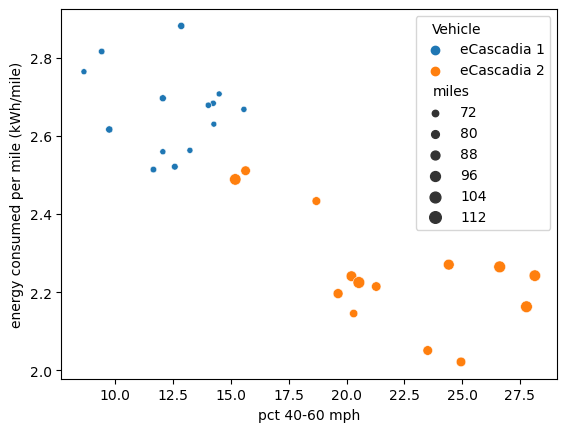

In [99]:
sns.scatterplot(data=days, x='pct 40-60 mph', y='energy consumed per mile (kWh/mile)', hue='Vehicle', size='miles')